In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/headbrain.csv')
print(df.head())

Mounted at /content/drive
   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [ ]:
x = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values
print(f"x (Head Size) sample: {x[:5]}")
print(f"y (Brain Weight) sample: {y[:5]}")


x (Head Size) sample: [4512 3738 4261 3777 4177]
y (Brain Weight) sample: [1530 1297 1335 1282 1590]


In [ ]:
mean_x = np.mean(x)
mean_y = np.mean(y)
mean_xy = np.mean(x * y)
mean_x2 = np.mean(x ** 2)
print(f"Mean of x: {mean_x}")
print(f"Mean of y: {mean_y}")
print(f"Mean of x*y: {mean_xy}")
print(f"Mean of x^2: {mean_x2}")


Mean of x: 3633.9915611814345
Mean of y: 1282.873417721519
Mean of x*y: 4696948.544303797
Mean of x^2: 13338747.637130802


In [ ]:
w1 = (mean_xy - mean_x * mean_y) / (mean_x2 - mean_x ** 2)
w0 = mean_y - w1 * mean_x
print(f"Slope (w1): {w1}")
print(f"Intercept (w0): {w0}")


Slope (w1): 0.2634293394893941
Intercept (w0): 325.57342104946156


In [ ]:
def linear_function(x, w0, w1):
    return w0 + w1 * x
y_pred_manual = linear_function(x, w0, w1)
print(f"First 5 predicted values: {y_pred_manual[:5]}\n")

First 5 predicted values: [1514.16660083 1310.27229206 1448.04583661 1320.5460363  1425.9177721 ]



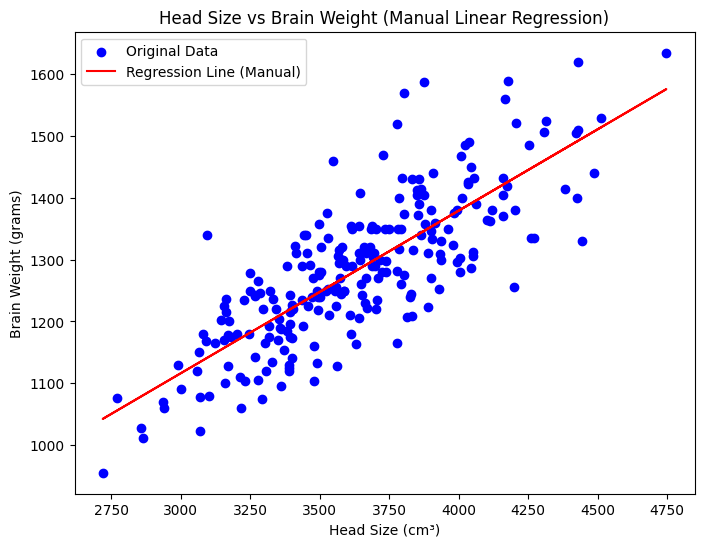

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred_manual, color='red', label='Regression Line (Manual)')
plt.xlabel('Head Size (cm³)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.title('Head Size vs Brain Weight (Manual Linear Regression)')
plt.show()

In [ ]:
mse_manual = mean_squared_error(y, y_pred_manual)
print(f"Manual Method Mean Squared Error (MSE): {mse_manual:.4f}")

Manual Method Mean Squared Error (MSE): 5201.3840


In [ ]:
from sklearn.linear_model import LinearRegression
X_reshaped = x.reshape(-1, 1)
model = LinearRegression()
model.fit(X_reshaped, y)
w1_sk = model.coef_[0]
w0_sk = model.intercept_
print(f"Scikit-learn coefficients:")
print(f"w1 (Slope) = {w1_sk}")
print(f"w0 (Intercept) = {w0_sk}")


Scikit-learn coefficients:
w1 (Slope) = 0.26342933948939934
w0 (Intercept) = 325.5734210494426


In [ ]:
y_pred_sk = model.predict(X_reshaped)
mse_sk = mean_squared_error(y, y_pred_sk)
print(f"Scikit-learn Mean Squared Error (MSE): {mse_sk:.4f}")


Scikit-learn Mean Squared Error (MSE): 5201.3840


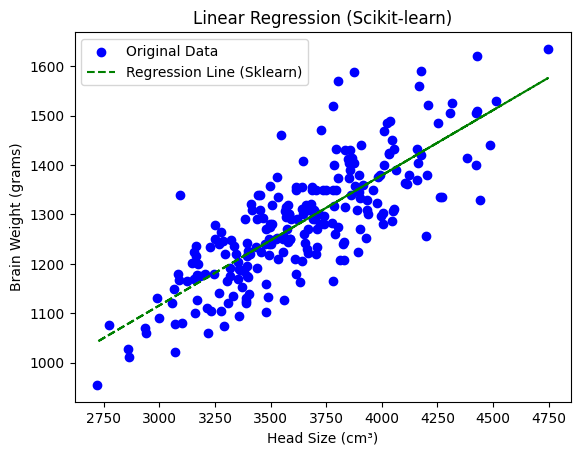

In [ ]:
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred_sk, color='green', linestyle='--', label='Regression Line (Sklearn)')
plt.xlabel('Head Size (cm³)')
plt.ylabel('Brain Weight (grams)')
plt.title('Linear Regression (Scikit-learn)')
plt.legend()
plt.show()